In [27]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [13]:
# Grid sizes
nn = np.array([16, 32, 64, 128, 256, 512])
# Times taken
tt = np.array([0.513, 1.005, 2.952, 10.902, 44.363, 7*60.0+36.9])
# Errors
errs = np.array([1.313485e-06, 3.314165e-07, 8.293797e-08, 2.076831e-08, 5.192377e-09, 1.298223e-09])

In [50]:
# Reshape nn for sklearn compatibility
logn = np.log(nn).reshape(-1,1)

# Fit linear regression model to time
reg_time = LinearRegression().fit(logn, np.log(tt))
# Fitted time
tt_trend = np.exp(reg_time.predict(logn))
beta_time = reg_time.coef_[0]

# Fit linear regression model to error
reg_error = LinearRegression().fit(logn, np.log(errs))
# Fitted time
err_trend = np.exp(reg_error.predict(logn))
beta_error = reg_error.coef_[0]

In [51]:
mpl.rcParams.update({'font.size': 30})

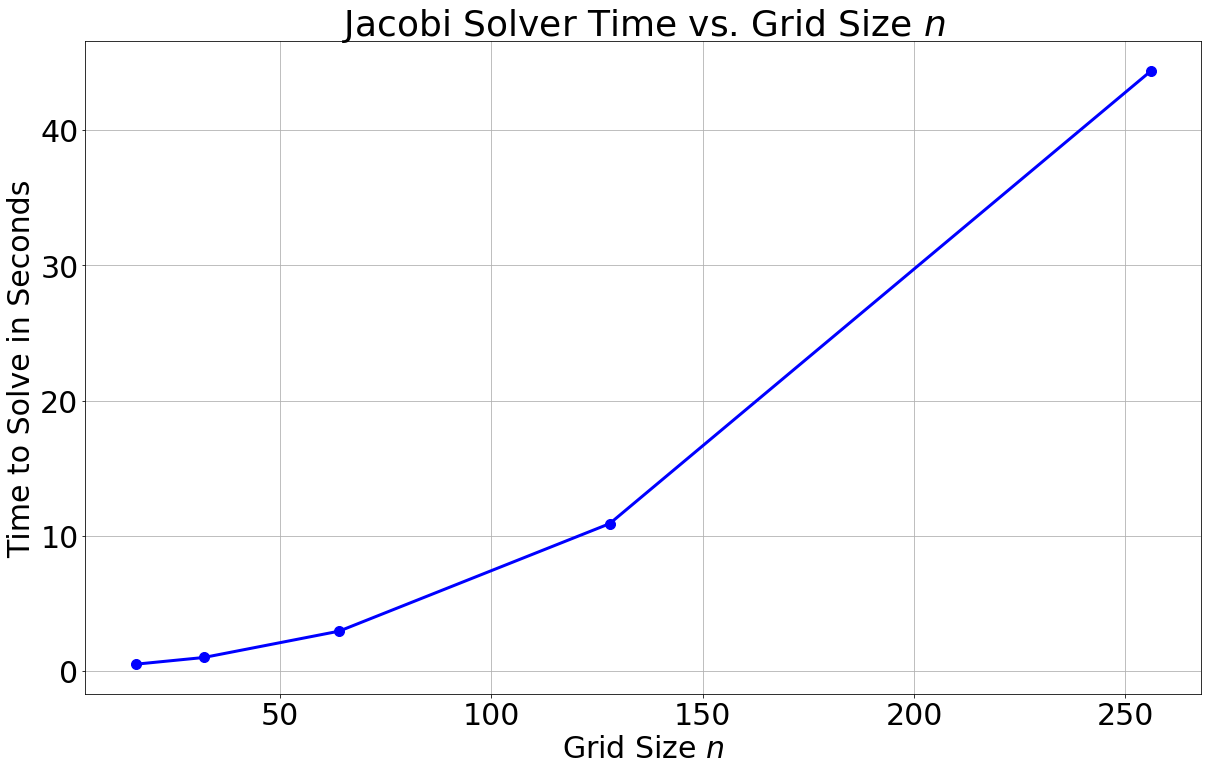

In [52]:
fig, ax = plt.subplots(figsize=[20,12])
ax.set_title('Jacobi Solver Time vs. Grid Size $n$')
ax.set_xlabel('Grid Size $n$')
ax.set_ylabel('Time to Solve in Seconds')
ax.plot(nn[0:-1], tt[0:-1], color='b', marker='o', linewidth=3.0, markersize=10)
ax.grid()
fig.savefig('../figs/jacobi_time_linear.png', bbox_inches='tight')

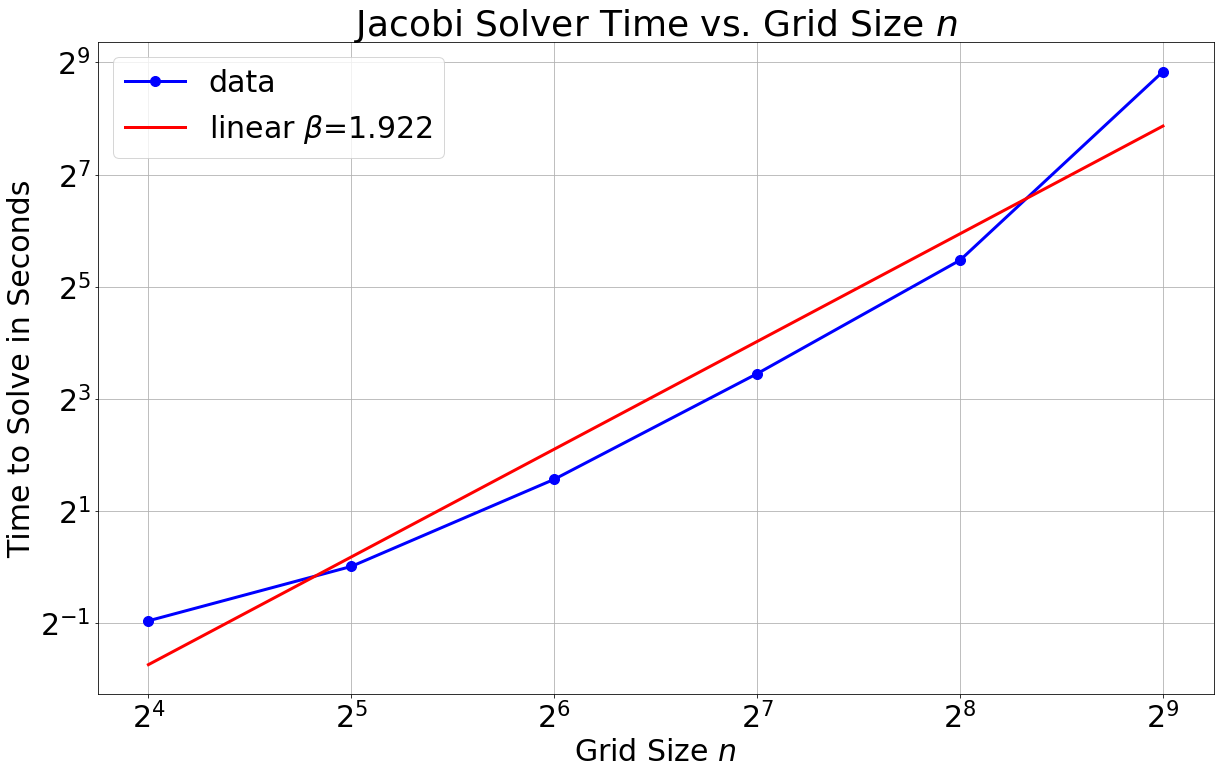

In [61]:
fig, ax = plt.subplots(figsize=[20,12])
ax.set_title('Jacobi Solver Time vs. Grid Size $n$')
ax.set_xlabel('Grid Size $n$')
ax.set_ylabel('Time to Solve in Seconds')
ax.set_xscale('log', basex=2)
ax.set_yscale('log', basey=2)
ax.plot(nn, tt, color='b', marker='o', linewidth=3.0, markersize=10, label='data')
ax.plot(nn, tt_trend, color='r', linewidth=3.0, label=f'linear $\\beta$={beta_time:0.3f}')
ax.grid()
ax.legend()
fig.savefig('../figs/jacobi_time.png', bbox_inches='tight')

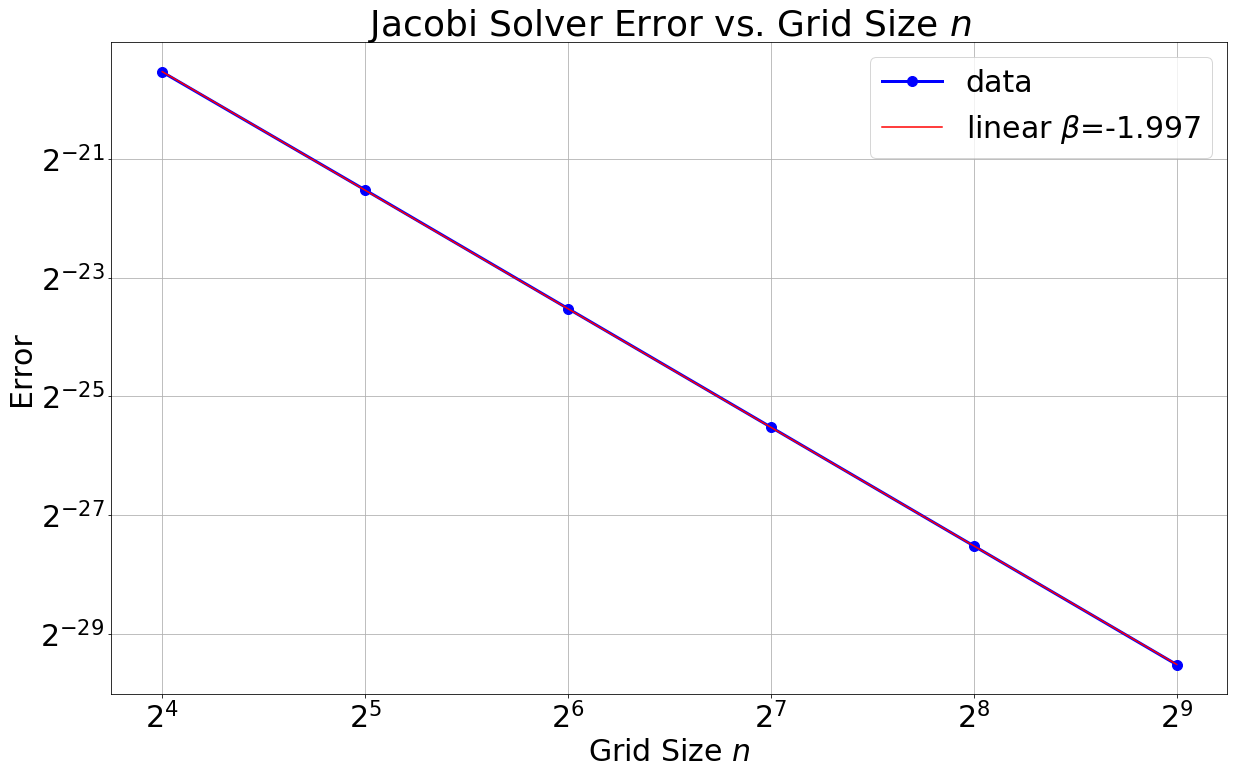

In [62]:
fig, ax = plt.subplots(figsize=[20,12])
ax.set_title('Jacobi Solver Error vs. Grid Size $n$')
ax.set_xlabel('Grid Size $n$')
ax.set_ylabel('Error')
ax.set_xscale('log', basex=2)
ax.set_yscale('log', basey=2)
ax.plot(nn, errs, color='b', marker='o', linewidth=3.0, markersize=10, label='data')
ax.plot(nn, err_trend, color='r', linewidth=1.5, label=f'linear $\\beta$={beta_error:0.3f}')
ax.grid()
ax.legend()
fig.savefig('../figs/jacobi_error.png', bbox_inches='tight')